In [1]:
using SlicedIonimageAnalysis
using DelimitedFiles
using PyPlot

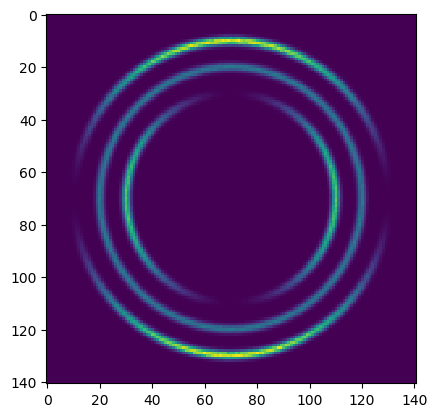

size(img) = (141, 141)


In [2]:
# Load a test image
img = readdlm("test\\test01.tsv")
@show size(img)
imshow(img)
;

In [3]:
# construct a SlicedImage with a center (71, 71)
s = SlicedImage(img, (71, 71))

SlicedIonimageAnalysis.SlicedImage:
  size     : 141 × 141


  center   : (71.0, 71.0)
  intensity: 6.49e+06
  radii    :   1.0 ..  70.0 [pixel]
  θ        :   0.0 .. 180.0 [degree]


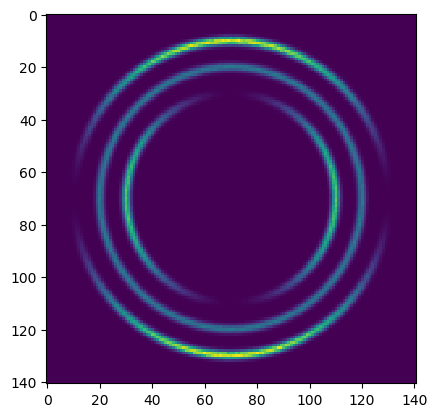

In [4]:
# convert a SlicedImage into an Array{Float64,2} (Matrix{Float64})
img = Array(s)
imshow(img)
;

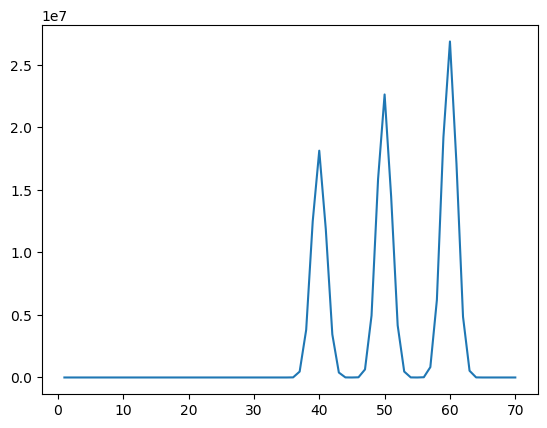

In [5]:
# plot the radial distribution
r, Ir = radialdist(s)  # r is a vector of radii in pixel unit
plot(r, Ir)
;

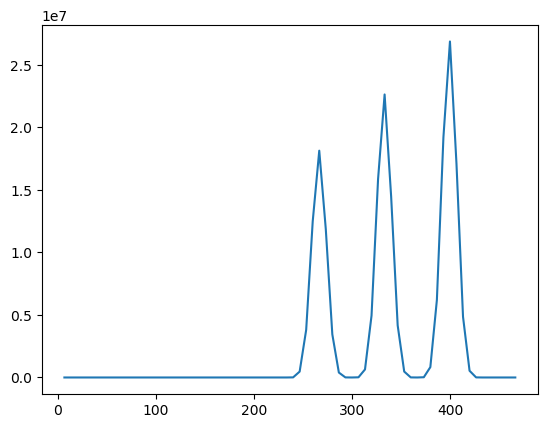

In [6]:
# plot the speed distribution
ppm = 10e3   # pixel-per-meter (px/m)
tof = 10e-6  # time-of-flight in second
N   = 1.5    # magnification factor
v, Iv = speeddist(s, ppm, tof, N)  # v is a vector of fragment recoil speed in m/s
plot(v, Iv)
;

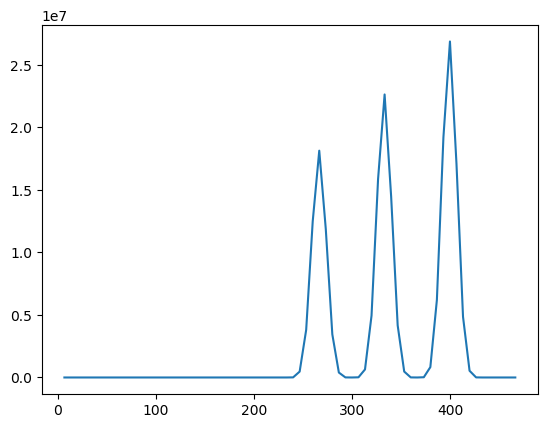

In [7]:
# calculate the speed distribution from the radial distribution
v, Iv = speeddist(r, Ir, ppm, tof, N)  # v is a vector of fragment recoil speed in m/s
plot(v, Iv)
;

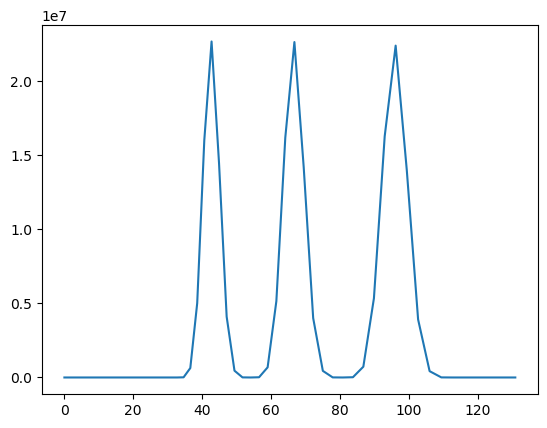

In [8]:
# plot the energy distribution (For example, observing I⁺ of CH₃I -> CH₃ + I)
m = 127      # the mass of photofragment
M = 142      # the mass of parent molecule
Et, IEt = energydist(s, ppm, tof, N, m, M)  # Et is a vector of center-of-mass kinetic energy release in kJ/mol
plot(Et, IEt)
;

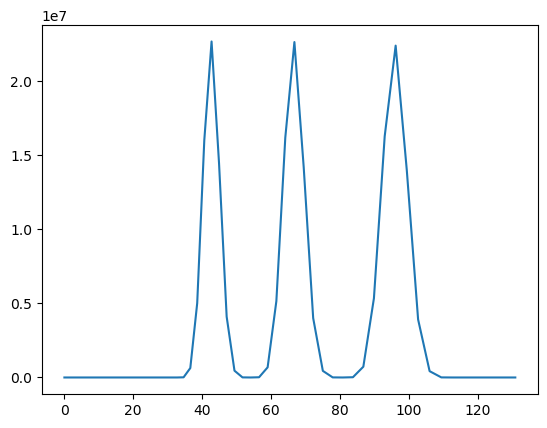

In [9]:
# calculate the energy distribution from the speed distribution
Et, IEt = energydist(v, Iv, m, M)  # Et is a vector of center-of-mass kinetic energy release in kJ/mol
plot(Et, IEt)
;

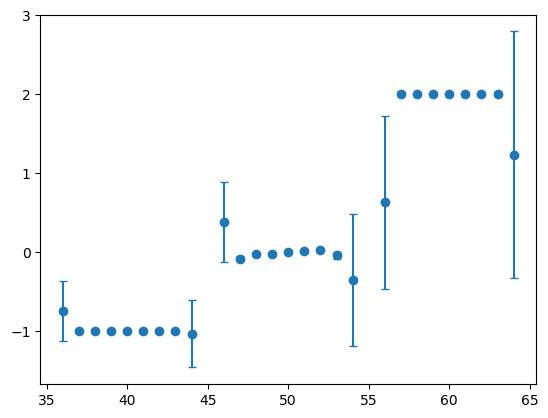

In [10]:
# plot β₂ along the radial axis
# NOTE that the  β₂ may not be reasonable if the corresponding radial distribution is too weak
r, b, berr = anisotropy(s)
β = b[:, 1]
βerr = berr[:, 1]
errorbar(r, β, βerr, fmt="o", capsize=3)
;

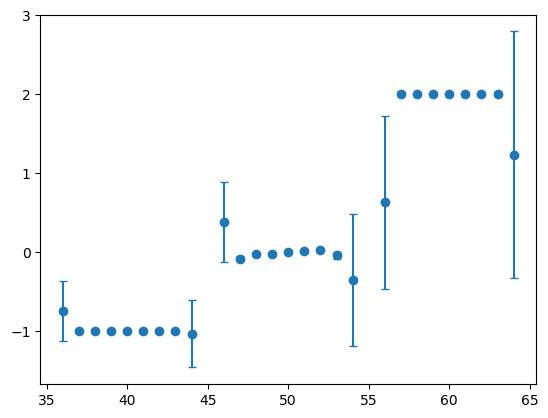

In [11]:
# plot β₂ along the speed axis
ppm = 10e3   # pixel-per-meter (px/m)
tof = 10e-6  # time-of-flight in second
N   = 1.5    # magnification factor
v, _ = speeddist(s, ppm, tof, N)
_, b, berr = anisotropy(s)
β = b[:, 1]
βerr = berr[:, 1]
errorbar(r, β, βerr, fmt="o", capsize=3)
;

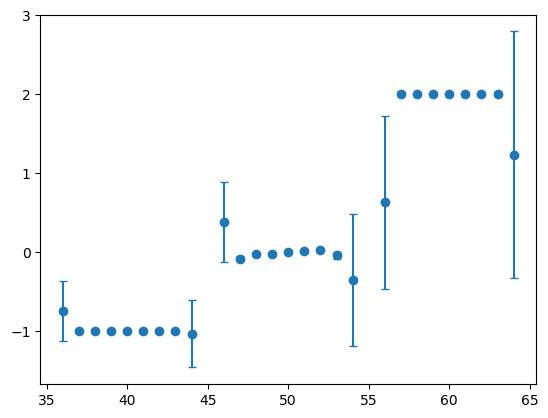

In [12]:
# plot β₂ along the energy axis
m = 127      # the mass of photofragment
M = 142      # the mass of parent molecule
Et, _ = energydist(s, ppm, tof, N, m, M)
_, b = anisotropy(s)
β = b[:, 1]
βerr = berr[:, 1]
errorbar(r, β, βerr, fmt="o", capsize=3)
;